## **NAME : Rehan Adil**
## **CK-21-110095**
## **BSCS 7th**

## **STEP 1:**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
dataset=pd.read_csv("/content/drive/MyDrive/ML-Datasets/WSN-DS.csv")

Mounted at /content/drive


Step 1

In [ ]:
dataset.head(100)

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Consumed Energy,label
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,101095,50,0,101010,21.19328,0,4,1,0,0,1,29,41,0,0,0.00000,3,0.06566,Normal
96,101096,50,0,101000,135.60354,0,4,1,0,0,1,2,48,0,0,0.00000,1,0.16106,Normal
97,101097,50,0,101000,27.57493,0,4,1,0,0,1,21,48,0,0,0.00000,1,0.07778,Normal
98,101098,50,0,101044,14.57213,0,4,1,0,0,1,18,38,0,0,0.00000,4,0.06093,Normal


In [ ]:
dataset.shape


(374661, 19)

In [ ]:
dataset.isnull().sum()

 id                 0
 Time               0
 Is_CH              0
 who CH             0
 Dist_To_CH         0
 ADV_S              0
 ADV_R              0
 JOIN_S             0
 JOIN_R             0
 SCH_S              0
 SCH_R              0
Rank                0
 DATA_S             0
 DATA_R             0
 Data_Sent_To_BS    0
 dist_CH_To_BS      0
 send_code          0
Consumed Energy     0
label               0
dtype: int64

In [ ]:
dataset.duplicated().sum()

8873

here we have duplictevalues


In [ ]:
dataset.drop_duplicates(inplace=True)

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.shape


(365788, 19)

yeh here we have drop the values that are duplicate . so here now we look to our label class and start to think and analyze it.
Rehan Adil RAA

In [ ]:
class_distribution = dataset['label'].value_counts()
class_distribution

label
Normal       332040
Grayhole      13909
Blackhole     10049
TDMA           6633
Flooding       3157
Name: count, dtype: int64

In [ ]:
class_distribution.sum()

365788

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming `dataset` is your pandas DataFrame and 'label' is the column name for class labels

# Step 1: Split the dataset into 2 equal parts
part1, temp_part = train_test_split(
    dataset,
    test_size=0.5,
    stratify=dataset['label']
)

# Step 2: Split the temporary part into 2 equal parts again
part2, part3 = train_test_split(
    temp_part,
    test_size=0.5,
    stratify=temp_part['label']
)

# Step 3: Split one of the resulting parts into 2 equal parts again
part3, part4 = train_test_split(
    part3,
    test_size=0.5,
    stratify=part3['label']
)

# Verify the distribution
print("Part 1 class distribution:\n", part1['label'].value_counts())
print("Part 2 class distribution:\n", part2['label'].value_counts())
print("Part 3 class distribution:\n", part3['label'].value_counts())
print("Part 4 class distribution:\n", part4['label'].value_counts())

Part 1 class distribution:
 label
Normal       166020
Grayhole       6955
Blackhole      5024
TDMA           3317
Flooding       1578
Name: count, dtype: int64
Part 2 class distribution:
 label
Normal       83010
Grayhole      3477
Blackhole     2512
TDMA          1658
Flooding       790
Name: count, dtype: int64
Part 3 class distribution:
 label
Normal       41505
Grayhole      1738
Blackhole     1256
TDMA           829
Flooding       395
Name: count, dtype: int64
Part 4 class distribution:
 label
Normal       41505
Grayhole      1739
Blackhole     1257
TDMA           829
Flooding       394
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Assuming part7 is your DataFrame and 'label' is the column name for class labels

# Step 1: Calculate the number of "Normal" instances to remove
num_normal_to_remove = part4[part4['label'] == 'Normal'].shape[0] // 2

# Step 2: Randomly select the rows to drop
normal_indices_to_drop = part4[part4['label'] == 'Normal'].sample(n=num_normal_to_remove, random_state=42).index

# Step 3: Drop those rows from the dataframe
part4_balanced = part4.drop(normal_indices_to_drop)

# Verify the new distribution
print("Part 4 class distribution after balancing Rehan Adil RAA:\n", part4_balanced['label'].value_counts())


Part 4 class distribution after balancing Rehan Adil RAA:
 label
Normal       20753
Grayhole      1739
Blackhole     1257
TDMA           829
Flooding       394
Name: count, dtype: int64


**# Observations** Rehan Adil RAA
# **There is a significant class imbalance, with the majority class being "Normal" (332,040 instances).**
# **Minority classes include "Grayhole", "Blackhole", "TDMA", and "Flooding".**

In [ ]:
from imblearn.over_sampling import SMOTE

# Assuming dataset is already loaded and duplicates removed
X = part4_balanced.drop('label', axis=1)
y = part4_balanced['label']

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine resampled data into a new DataFrame
balanced_dataset = pd.DataFrame(X_resampled, columns=X.columns)
balanced_dataset['label'] = y_resampled

# Verify the new class distribution
new_class_distribution = balanced_dataset['label'].value_counts()
print(new_class_distribution)


label
Normal       20753
TDMA         20753
Grayhole     20753
Flooding     20753
Blackhole    20753
Name: count, dtype: int64


In [ ]:
new_class_distribution.sum()

103765

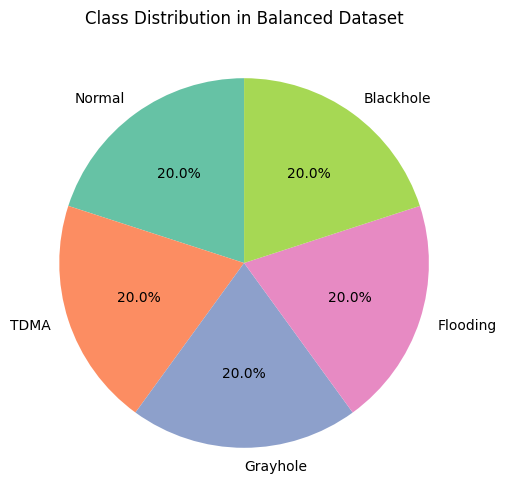

In [ ]:
# Class distribution
class_counts = balanced_dataset['label'].value_counts()

# Pie chart
plt.figure(figsize=(10, 6))
class_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2', len(class_counts)))
plt.title('Class Distribution in Balanced Dataset')
plt.ylabel('')
plt.show()


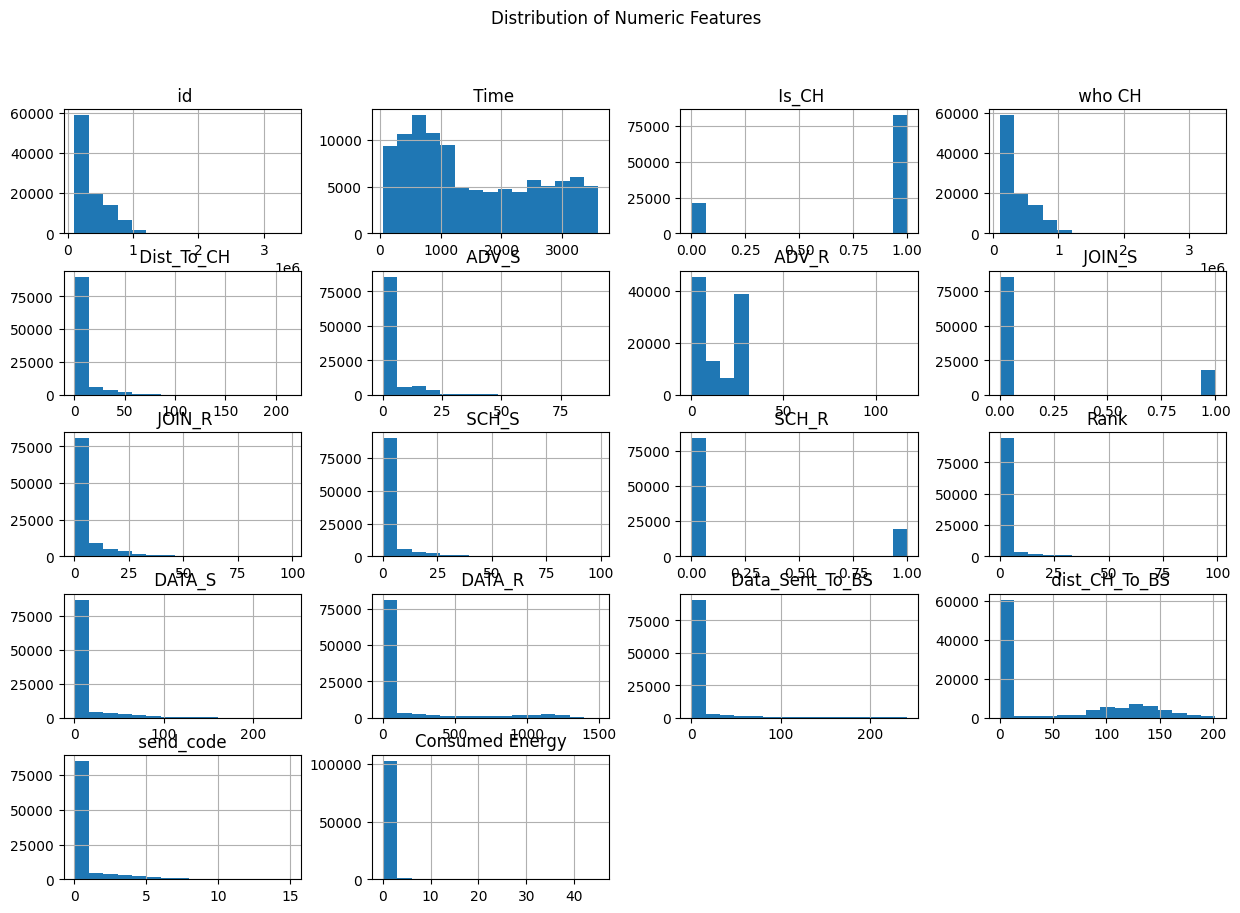

In [ ]:
# Select numeric columns
numeric_cols = balanced_dataset.select_dtypes(include=np.number).columns

# Histograms
balanced_dataset[numeric_cols].hist(bins=15, figsize=(15, 10), layout=(5, 4))
plt.suptitle('Distribution of Numeric Features')
plt.show()


<ipython-input-17-94204a74c2f8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=balanced_dataset, palette='Set2')
<ipython-input-17-94204a74c2f8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=balanced_dataset, palette='Set2')
<ipython-input-17-94204a74c2f8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=col, data=balanced_dataset, palette='Set2')
<ipython-input-17-94204a74c2f8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0

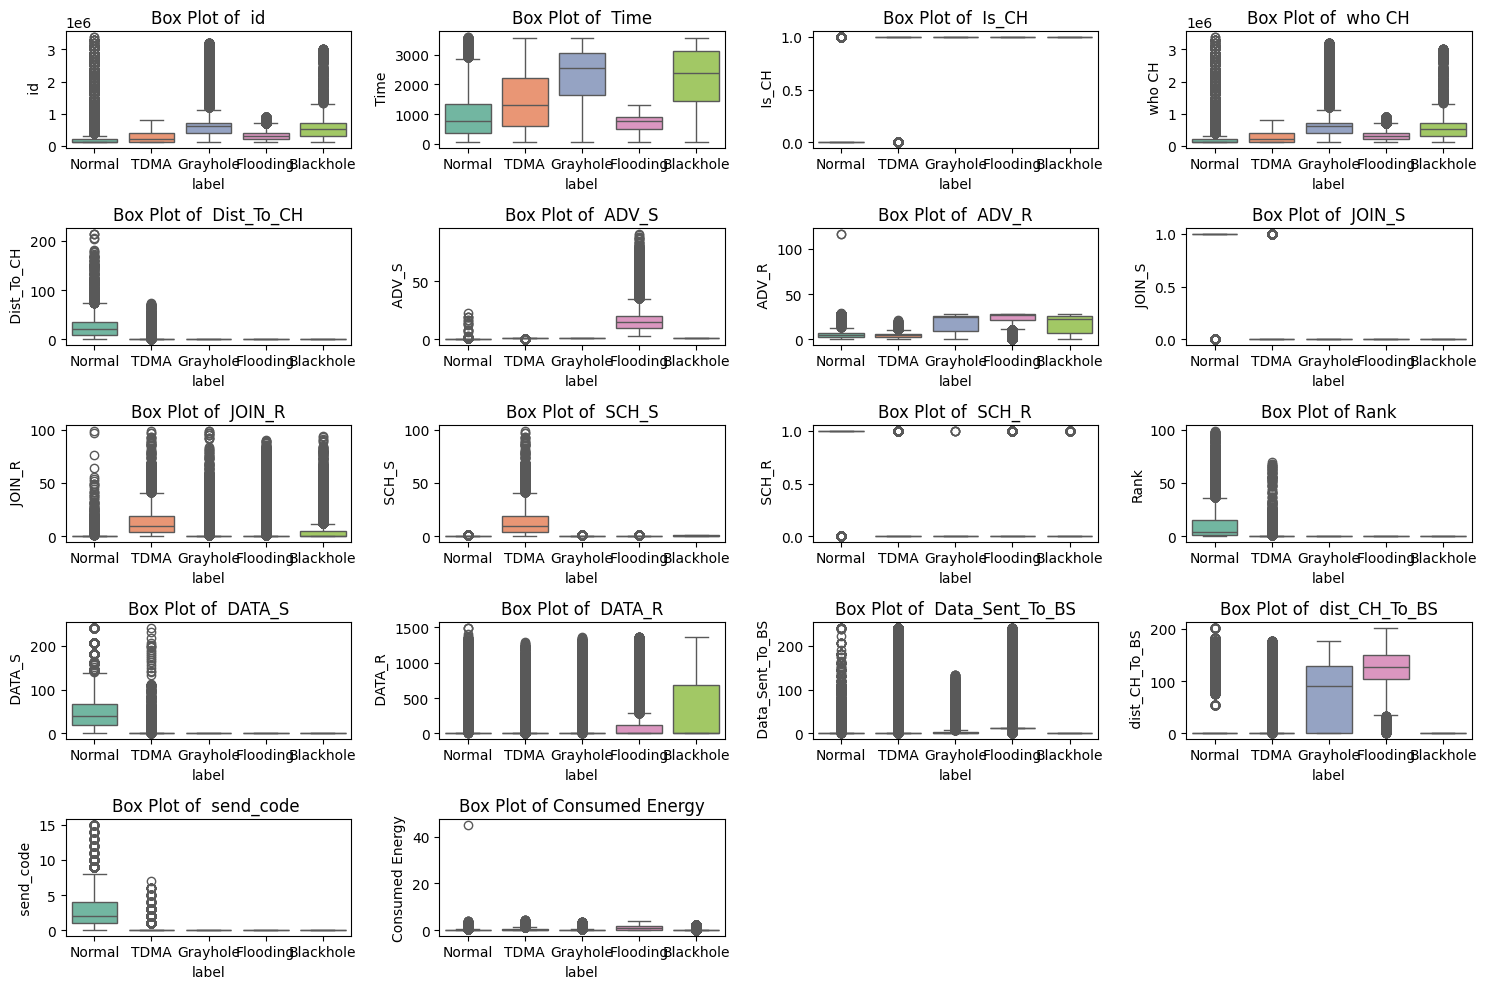

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(x='label', y=col, data=balanced_dataset, palette='Set2')
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


In [ ]:
# Compute correlation matrix
corr_matrix = balanced_dataset[numeric_cols].corr()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Sample a subset for pair plot to reduce computation
sampled_data = balanced_dataset.sample(1000, random_state=42)
sns.pairplot(sampled_data, hue='label', palette='Set2', markers=["o", "s", "D", "P", "X"])
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Example: Creating interaction and polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(balanced_dataset[numeric_cols])

# Convert the polynomial features to a DataFrame
poly_feature_names = poly.get_feature_names_out(numeric_cols)
poly_features_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# Concatenate the polynomial features with the original dataset
enhanced_dataset = pd.concat([balanced_dataset.reset_index(drop=True), poly_features_df], axis=1)



In [ ]:
# Separate features and target variable
X = enhanced_dataset.drop('label', axis=1)
y = enhanced_dataset['label']
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

# Apply SelectKBest to extract the top 10 features
select_k_best = SelectKBest(score_func=f_classif, k=10)
fit = select_k_best.fit(X_train, y_train)

# Get columns to keep and create a new DataFrame with only the selected features
cols = select_k_best.get_support(indices=True)
selected_features_df = X.iloc[:, cols]

# Add the target variable back
selected_features_df['label'] = y



/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 70  73  77  78  82  98 112 116 117 121 134 135 145 153] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
<ipython-input-30-c40326039f33>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features_df['label'] = y


In [ ]:
# Get feature scores
feature_scores = pd.DataFrame({'Feature': X_train.columns[cols], 'Score': fit.scores_[cols]})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Plot the feature scores
plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Feature', data=feature_scores, palette='viridis')
plt.title('Feature Importance Scores')
plt.show()


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize models
models = {
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Example for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Base models
base_models = [
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('SVM', SVC(probability=True)),
    ('KNN', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier())
]

# Meta-model
meta_model = LogisticRegression()

# Stacking model
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=3)

# Train stacking model
stacking_model.fit(X_train, y_train)


In [ ]:
# Define parameter grid for the meta-model
param_grid = {
    'final_estimator__C': [0.1, 1, 10],
    'final_estimator__solver': ['lbfgs']
}
from sklearn.model_selection import RandomizedSearchCV

# Randomized search
random_search = RandomizedSearchCV(stacking_model, param_distributions=param_grid, n_iter=10, cv=3, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters and model
best_params = random_search.best_params_
best_stacking_model = random_search.best_estimator_


# Grid search
grid_search = GridSearchCV(stacking_model, param_grid, cv=3)  # Use 3-fold cross-validation
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_stacking_model = grid_search.best_estimator_


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision (macro)': precision_score(y_test, y_pred, average='macro'),
        'Recall (macro)': recall_score(y_test, y_pred, average='macro'),
        'F1 Score (macro)': f1_score(y_test, y_pred, average='macro'),
        'Precision (weighted)': precision_score(y_test, y_pred, average='weighted'),
        'Recall (weighted)': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score (weighted)': f1_score(y_test, y_pred, average='weighted'),
        'ROC AUC (macro)': roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro') if y_prob is not None else 'N/A',
        'ROC AUC (weighted)': roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted') if y_prob is not None else 'N/A'
    }
    return metrics

# Evaluate standalone models
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_test, y_test)

# Evaluate stacking model
results['Stacking'] = evaluate_model(best_stacking_model, X_test, y_test)

# Display results
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print("\n")



In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Classification Report': classification_report(y_test, y_pred, output_dict=True),
    }
    if y_prob is not None:
        metrics['ROC AUC (macro)'] = roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro')
        metrics['ROC AUC (weighted)'] = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')
    else:
        metrics['ROC AUC (macro)'] = 'N/A'
        metrics['ROC AUC (weighted)'] = 'N/A'
    return metrics

# Evaluate standalone models
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_test, y_test)

# Evaluate stacking model
results['Stacking'] = evaluate_model(best_stacking_model, X_test, y_test)



In [ ]:
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

for name, model in models.items():
    plot_confusion_matrix(model, X_test, y_test, name)

plot_confusion_matrix(best_stacking_model, X_test, y_test, 'Stacking')


In [ ]:
def plot_roc_curve(model, X_test, y_test, model_name):
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(len(model.classes_)):
            fpr[i], tpr[i], _ = roc_curve(y_test == model.classes_[i], y_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        plt.figure(figsize=(10, 7))
        for i in range(len(model.classes_)):
            plt.plot(fpr[i], tpr[i], label=f'Class {model.classes_[i]} (area = {roc_auc[i]:0.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model_name}')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print(f"Model {model_name} does not have predict_proba method")

for name, model in models.items():
    plot_roc_curve(model, X_test, y_test, name)

plot_roc_curve(best_stacking_model, X_test, y_test, 'Stacking')


In [ ]:
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    print(f"Accuracy: {metrics['Accuracy']}")
    print("Classification Report:")
    print(metrics['Classification Report'])
    print(f"ROC AUC (macro): {metrics['ROC AUC (macro)']}")
    print(f"ROC AUC (weighted): {metrics['ROC AUC (weighted)']}")
    print("\n")
